In [1]:
#simple plot - daily transfer volume by day over last 3 months.
#plot transfersize vs time
#transfersize summed by every hour

In [1]:
import findspark
findspark.init()
import pyspark
import random
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import pyspark.sql.functions as pyf
import numpy as np
import pandas 

In [2]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [3]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

In [4]:
from pyspark.sql import SparkSession


spark = SparkSession \
            .builder \
            .appName("foo") \
            .config("spark.jars",  "/root/postgresql-42.4.0.jar ") \
            .getOrCreate() \

df = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "billinginfo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "1") \
     .option("fetchsize", 1000) \
     .load()
spark.sparkContext.setLogLevel("WARN")


/usr/local/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning


In [5]:
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,client,string
1,initiator,string
2,isnew,boolean
3,protocol,string
4,transfersize,bigint
5,fullsize,bigint
6,storageclass,string
7,connectiontime,bigint
8,action,string
9,cellname,string


In [6]:
df_month= df.filter((df.datestamp >= '2022-06-22 00:00:00') & (df.datestamp <'2022-06-22 06:00:00'))
df_month.select('datestamp').show(100)

+--------------------+
|           datestamp|
+--------------------+
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22

In [7]:
df_month.count()

1691338

In [8]:
df_month.select('transfersize','fullsize','connectiontime').describe().show()

+-------+-------------------+--------------------+------------------+
|summary|       transfersize|            fullsize|    connectiontime|
+-------+-------------------+--------------------+------------------+
|  count|            1691338|             1691338|           1691338|
|   mean|1.537006027447914E8|3.3723347551084524E8|181791.99943417578|
| stddev| 8.52809593158018E8|1.2795197785990376E9|  766688.164108149|
|    min|                  0|                   0|                 0|
|    max|       603980992584|        603980992584|          39439670|
+-------+-------------------+--------------------+------------------+



In [9]:
df_month= df_month.withColumn("date", to_date(df.datestamp))
df_month.select('date').show(100)
df_month= df_month.withColumn("time", date_format('datestamp', 'HH'))
df_month.select('time').show(100)

+----------+
|      date|
+----------+
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|

In [10]:
pd.DataFrame(df_month.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,client,string
1,initiator,string
2,isnew,boolean
3,protocol,string
4,transfersize,bigint
5,fullsize,bigint
6,storageclass,string
7,connectiontime,bigint
8,action,string
9,cellname,string


In [11]:
df1= df_month.select('date','time', 'transfersize' )
df1.show(100)

+----------+----+------------+
|      date|time|transfersize|
+----------+----+------------+
|2022-06-22|  00|   101494602|
|2022-06-22|  00|    40026724|
|2022-06-22|  00|    99830532|
|2022-06-22|  00|   246421431|
|2022-06-22|  00|    39484920|
|2022-06-22|  00|    56552738|
|2022-06-22|  00|        2653|
|2022-06-22|  00|    49184495|
|2022-06-22|  00|   100571638|
|2022-06-22|  00|   832753944|
|2022-06-22|  00|     5706045|
|2022-06-22|  00|    14605397|
|2022-06-22|  00|   538089423|
|2022-06-22|  00|   323725824|
|2022-06-22|  00|       68692|
|2022-06-22|  00|    55106340|
|2022-06-22|  00|    47629013|
|2022-06-22|  00|     1990632|
|2022-06-22|  00|    47793081|
|2022-06-22|  00|       68692|
|2022-06-22|  00|    76024496|
|2022-06-22|  00|   249556901|
|2022-06-22|  00|   259395741|
|2022-06-22|  00|   197415192|
|2022-06-22|  00|   508905887|
|2022-06-22|  00|    39543517|
|2022-06-22|  00|   504887977|
|2022-06-22|  00|    54875047|
|2022-06-22|  00|   369394993|
|2022-06

In [13]:
# spark.conf.set("spark.sql.execution.arrow.enabled", "true")
# spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
# spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")

In [14]:
#pd_df = df1.toPandas()

In [14]:
pd_df = df1.toPandas()
print(pd_df)

               date time  transfersize
0        2022-06-22   00     101494602
1        2022-06-22   00      40026724
2        2022-06-22   00      99830532
3        2022-06-22   00     246421431
4        2022-06-22   00      39484920
...             ...  ...           ...
1691333  2022-06-22   05       1099901
1691334  2022-06-22   05      45228085
1691335  2022-06-22   05         68836
1691336  2022-06-22   05      48616251
1691337  2022-06-22   05      11025375

[1691338 rows x 3 columns]


In [15]:
pd4=pd_df.groupby(['time']).sum()

<AxesSubplot:xlabel='time'>

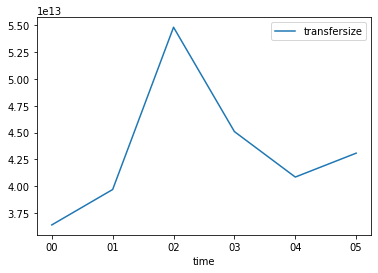

In [16]:
pd4.plot(kind = 'line')

<AxesSubplot:xlabel='time'>

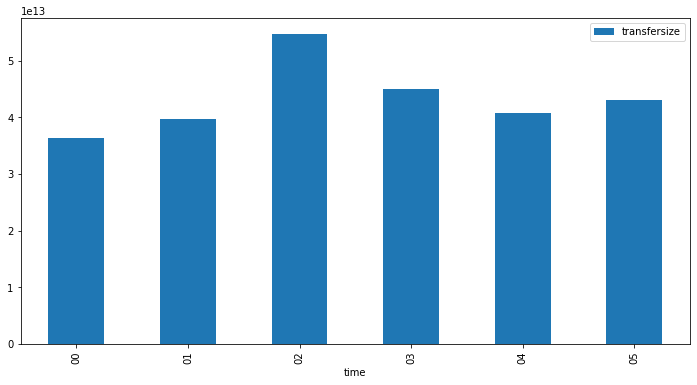

In [23]:
pd4.plot( kind = 'bar',figsize=(12,6))